# 11-1. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

자, 이제 여러분이 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아볼 차례입니다.

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아닙니다.  
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있습니다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는 EDA 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요합니다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있습니다.  

오늘은 이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 마세요!

#### 라이브러리 버전을 확인해 봅니다  
---
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


1.4.2
3.3.0
0.5.0
1.0


✓ 튜닝해볼 수 있는 모델 클래스 인자
---
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

- max_depth : 의사 결정 나무의 깊이, 정수 사용
- learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
- n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
- num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
- boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력

위에서 저는 n_estimators와 max_depth 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

- lightGBM / XGBoost 파라미터 설명 : https://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/
- Chapter 4. 분류 - LightGBM : https://injo.tistory.com/48

위의 자료 외에도 lightgbm, xgboost 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

✓ 시도해볼 수 있는 방법
---
여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

- 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
- LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
- 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
- Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

- https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks

아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.

그럼, 시작해보죠! 화이팅!!! 💪🏼

#### 프로젝트 루브릭
---
- 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
- 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
- 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?

## 1. 데이터 로드 및 EDA

In [2]:
# 라이브러리 import
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import missingno as msno
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

#### scikit-optimize 설치
```bash
pip install scikit-optimize
```

In [26]:
from skopt import BayesSearchCV

In [3]:
import os
from os.path import join

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# 1. 데이터 로드
data_dir =os.getenv("HOME") +"/aiffel/kaggle_kakr_housing/data/"

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


 date 를 int, 즉 정수형 데이터로 처리

In [8]:
# date 를 int, 즉 정수형 데이터로 처리
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


y 변수에 price를 넣어두고, train에서는 삭제

In [9]:
# y 변수에 price를 넣어두고, train에서는 삭제
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


id 컬럼 삭제

In [10]:
# id 컬럼 삭제
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
# test data 적용
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


y 의 분포를 확인

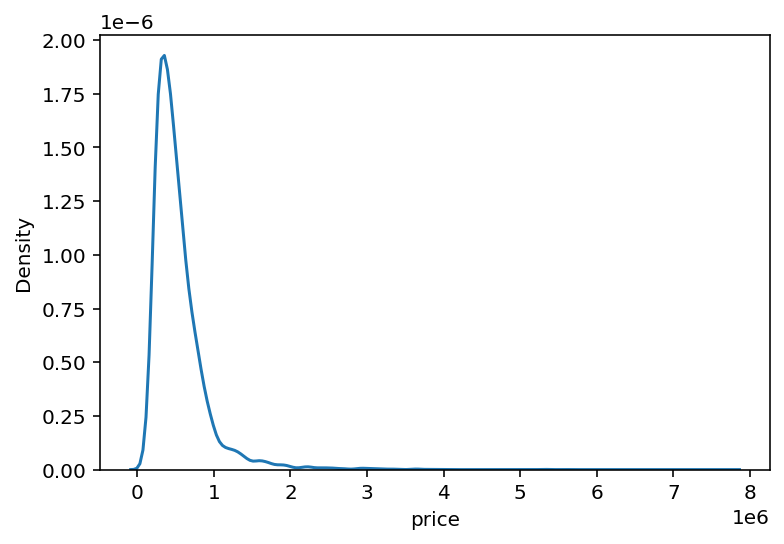

In [13]:
sns.kdeplot(y)
plt.show()

y는 np.log1p() 함수를 통해 로그 변환을 해주고, 나중에 모델이 값을 예측한 후에 다시 np.expm1()을 활용해서 되돌림

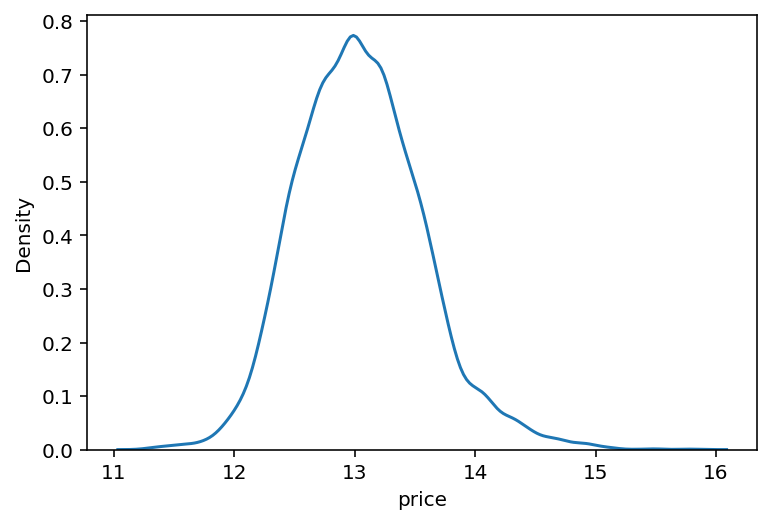

In [14]:
# y 값 로그 변환
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

## 2. 데이터 전처리

전체 데이터의 자료형 확인

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

<AxesSubplot:>

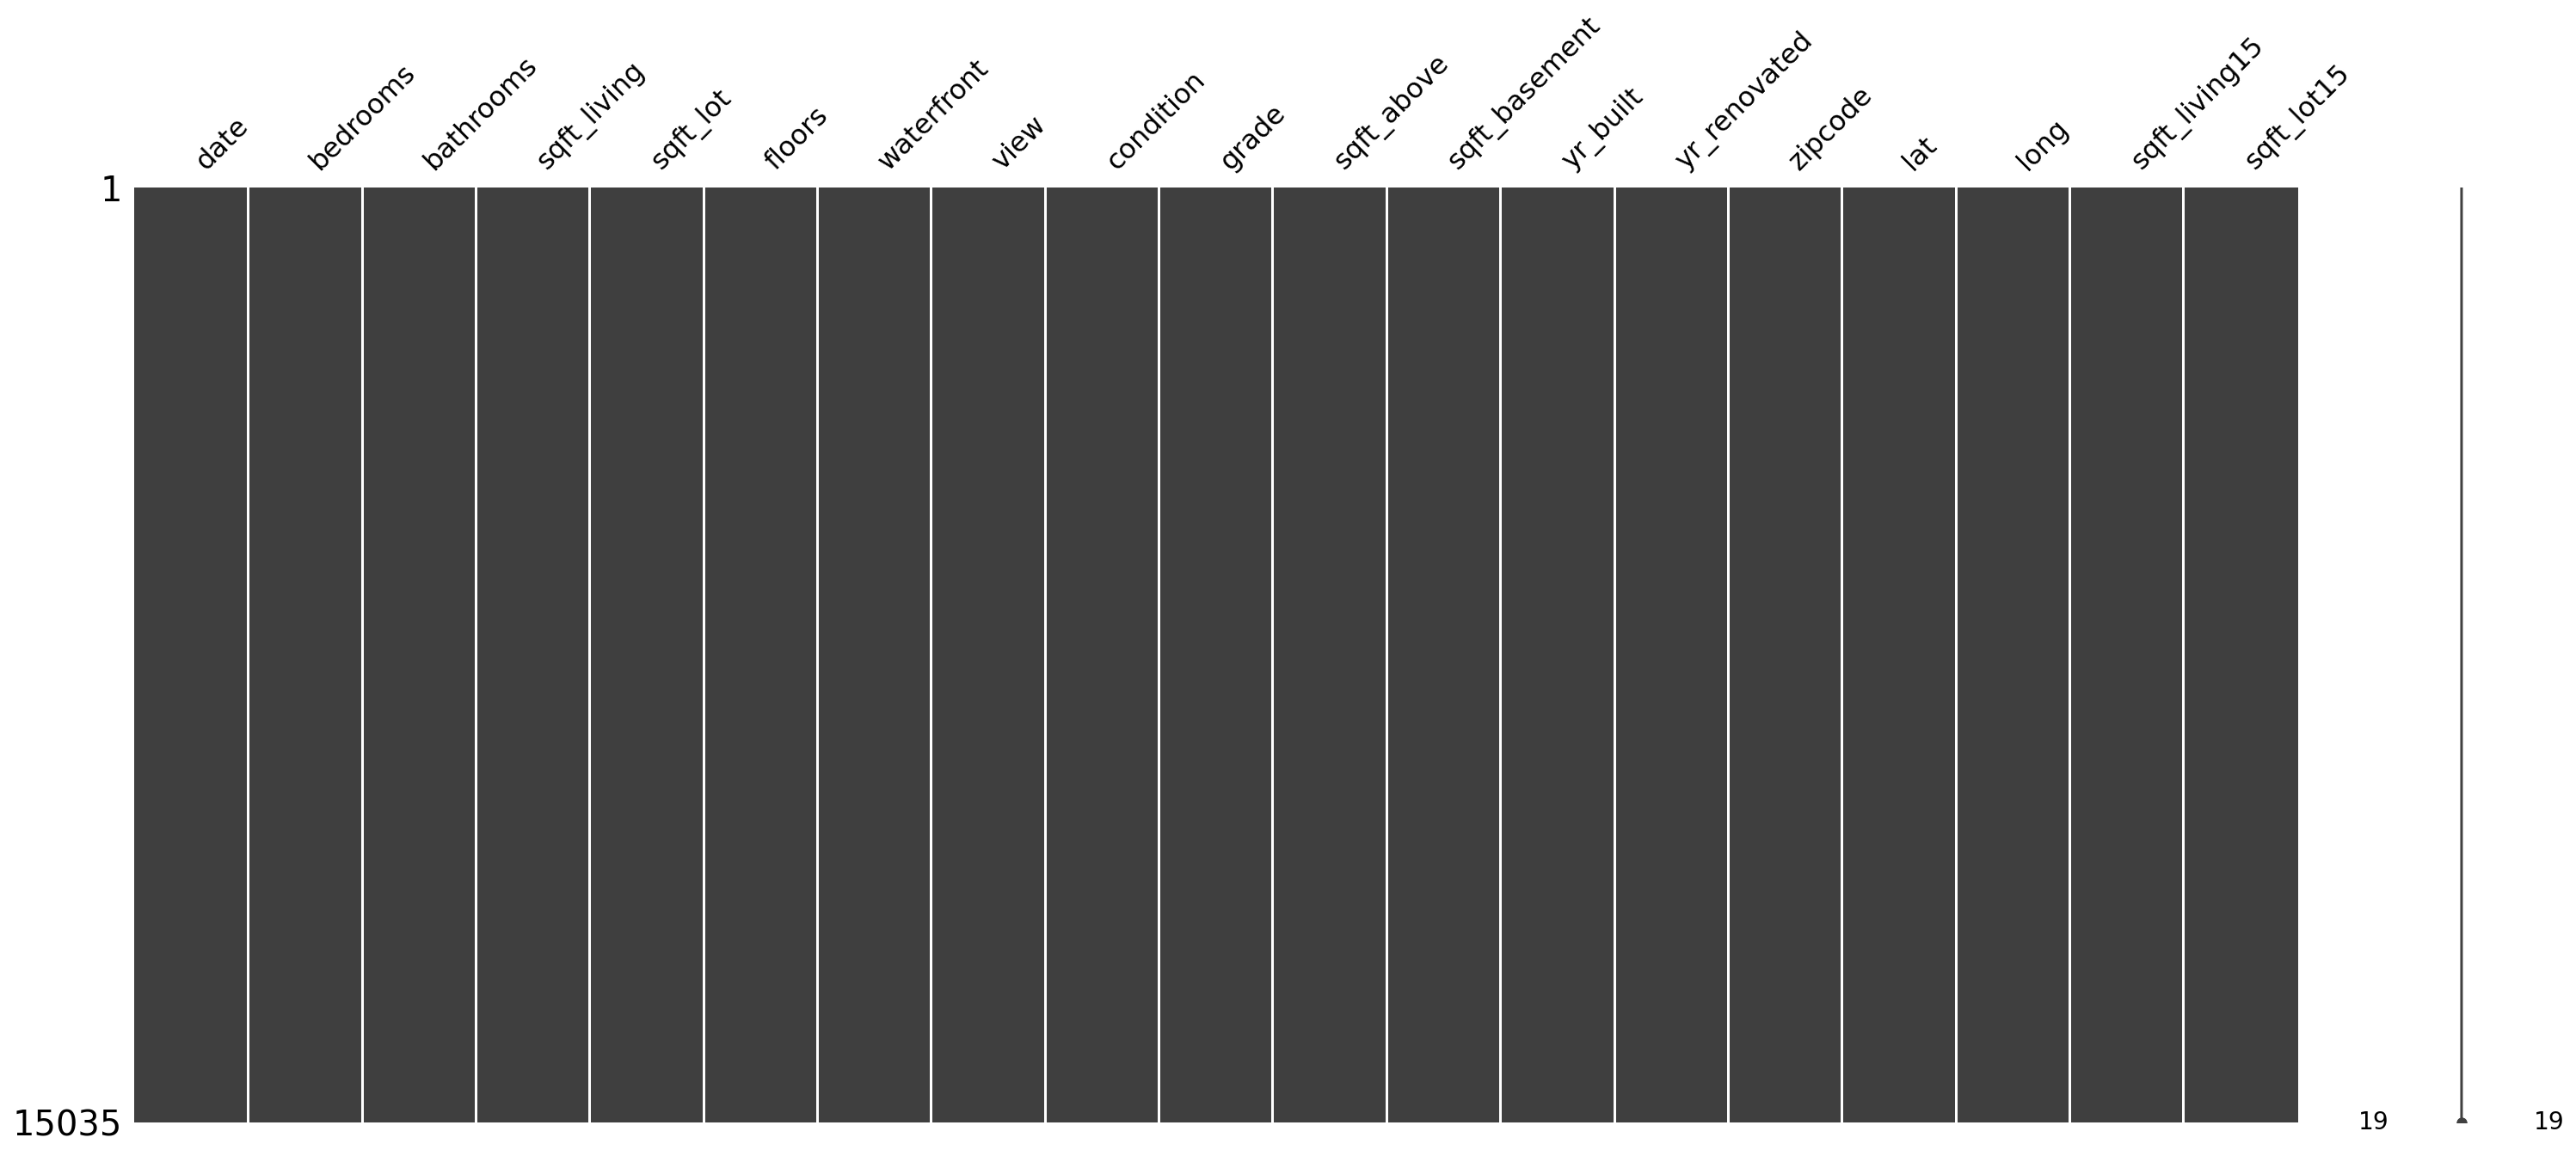

In [16]:
# 결측치 시각화
msno.matrix(train)

결측치 없이 모두 실수 또는 정수 자료형으로, 문제 없이 모델 학습에 활용가능

In [17]:
#  RMSE값 get_scores(models, train, y) 함수 작성
def get_scores(models, train, y):
    # 답안 작성
    df = {}
    
    # train, test 데이터셋 분리
    # random_state를 사용하여 고정하고 train과 test 셋의 비율은 8:2로 합니다.
    # [[YOUR CODE]]
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)

    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # 모델 학습
        # [[YOUR CODE]]
        model.fit(X_train, y_train)

        # 예측
        # [[YOUR CODE]]
        y_pred = model.predict(X_test)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred) # [[YOUR CODE]]

    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df


In [18]:
# RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환 함수
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [19]:
# 결과 csv 파일 제출 함수
# 1. 모델을 `train`, `y`로 학습시킵니다.
# 2. `test`에 대해 예측합니다.
# 3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

### 나만의 적용 기법 사용 시도
- 베이지안 최적화(Bayesian Optimization) 사용
- 스케일링 및 변환 과정에 PowerTransformer를 추가해 데이터의 분포를 정규화
- 앙상블 기법으로 Stacking Regressor를 사용

In [20]:
# Feature와 Target 분리
X = train
y = y

# 데이터 분할, vaild 사용
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_valid.shape)

(12028, 19)
(3007, 19)


In [22]:
# 모든 피처의 범위를 비슷하게 맞춰주는 스케일링 기법 사용
# 모델이 더 빠르게, 더 정확하게 수렴할 수 있게 해줌
# 하이퍼 파라미터 튜닝 과정에서 스케일링이 되어 있으면 최적의 하이퍼 파라미터를 더 쉽게 찾거나 다른 모델과 함께 사용할 때 성능을 개선
# 스케일링 및 변환 (PowerTransformer 사용)

scaler = StandardScaler()
pt = PowerTransformer()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_train = pt.fit_transform(X_train)
X_valid = pt.transform(X_valid)
test = scaler.transform(test)
test = pt.transform(test)

## 3. 모델 학습 및 하이퍼 파라미터 튜닝 (베이지안 최적화 적용)

In [23]:
# LightGBM 모델 학습
lgb_reg = lgb.LGBMRegressor(random_state=42)  # LightGBM 모델 초기화
params_lgb = {
    'n_estimators': (100, 1000),  # 트리의 개수, 100부터 1000까지 탐색
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # 학습률, 0.01에서 0.3 사이를 로그 균등 분포로 탐색
    'max_depth': (3, 15),  # 트리의 최대 깊이, 3부터 15까지 탐색
    'num_leaves': (20, 100),  # 하나의 트리가 가질 수 있는 최대 잎 노드 수, 20에서 100 사이를 탐색
    'min_child_samples': (5, 30)  # 리프 노드가 가져야 하는 최소 샘플 수, 5에서 30 사이를 탐색
}

#### BayesSearchCV: 위에서 scikit-optimize 설치후 사용 가능
- BayesSearchCV는 하이퍼파라미터 최적화를 위한 방법 중 하나
- GridSearchCV는 모든 가능한 하이퍼파라미터의 조합을 시도하고, RandomizedSearchCV는 랜덤하게 시도하지만, 
- BayesSearchCV는 이전의 평가 결과를 바탕으로 탐색할 위치를 점진적으로 최적화

#### BayesSearchCV의 주요 매개변수
- estimator: 최적화를 수행할 머신 러닝 모델입니다. (예: LGBMRegressor, RandomForestRegressor)
- search_spaces: 하이퍼파라미터의 범위를 정의합니다. GridSearchCV와 비슷하게 탐색할 하이퍼파라미터의 범위를 설정합니다.
- n_iter: 최적화를 위한 반복 횟수입니다. 이 값을 통해 탐색할 횟수를 조정할 수 있습니다.
- cv: 교차 검증을 수행할 폴드 수입니다. cv=3은 3-폴드 교차 검증을 의미합니다.
- scoring: 모델 성능을 평가할 지표입니다. 예를 들어, 회귀 문제에서는 'neg_mean_squared_error'를 사용할 수 있습니다.

In [28]:
# LightGBM 모델의 하이퍼파라미터를 베이지안 최적화 방식으로 탐색
# n_iter=50: 50회의 반복을 통해 최적의 하이퍼파라미터를 탐색
# cv=3: 3-폴드 교차 검증을 사용하여 모델 성능을 평가
# scoring='neg_mean_squared_error': 모델 성능을 평가할 NMSE 사용
# random_state=42: 랜덤 시드를 고정
# n_jobs=-1: 가능한 모든 CPU 코어를 사용
bayes_lgb = BayesSearchCV(lgb_reg, params_lgb, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
bayes_lgb.fit(X_train, y_train)

print("Best parameters for LightGBM (Bayesian Optimization):", bayes_lgb.best_params_)
print("Best score (MSE):", -bayes_lgb.best_score_)

Best parameters for LightGBM (Bayesian Optimization): OrderedDict([('learning_rate', 0.014690497979440801), ('max_depth', 14), ('min_child_samples', 27), ('n_estimators', 925), ('num_leaves', 29)])
Best score (MSE): 0.02665036336568757


In [29]:
# XGBoost 모델 학습
xgb_reg = xgb.XGBRegressor(random_state=42)  # XGBoost 모델 초기화
params_xgb = {
    'n_estimators': (100, 500),  # 트리의 개수, 100부터 500까지 탐색
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # 학습률, 0.01에서 0.3 사이를 로그 균등 분포로 탐색
    'max_depth': (3, 10),  # 트리의 최대 깊이, 3부터 10까지 탐색
    'colsample_bytree': (0.3, 0.7)  # 각 트리를 생성할 때 사용할 피처의 비율, 0.3에서 0.7 사이를 탐색
}

In [30]:
bayes_xgb = BayesSearchCV(xgb_reg, params_xgb, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
bayes_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost (Bayesian Optimization):", bayes_xgb.best_params_)
print("Best score (MSE):", -bayes_xgb.best_score_)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


Best parameters for XGBoost (Bayesian Optimization): OrderedDict([('colsample_bytree', 0.622894434695805), ('learning_rate', 0.028271108230208314), ('max_depth', 10), ('n_estimators', 419)])
Best score (MSE): 0.026121487721665202


In [32]:
# RandomForest 모델 학습
rf_reg = RandomForestRegressor(random_state=42)
params_rf = {
    'n_estimators': (100, 500),  # 트리의 개수, 100부터 500까지 탐색
    'max_depth': (5, 20),  # 트리의 최대 깊이, 5부터 20까지 탐색
    'min_samples_split': (2, 10),  # 내부 노드를 분할하기 위한 최소 샘플 수, 2에서 10 사이 탐색
    'min_samples_leaf': (1, 5)  # 리프 노드가 가져야 하는 최소 샘플 수, 1에서 5 사이 탐색
}

In [33]:
bayes_rf = BayesSearchCV(rf_reg, params_rf, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
bayes_rf.fit(X_train, y_train)

print("Best parameters for RandomForest (Bayesian Optimization):", bayes_rf.best_params_)
print("Best score (MSE):", -bayes_rf.best_score_)

Best parameters for RandomForest (Bayesian Optimization): OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
Best score (MSE): 0.03292442917953713


In [34]:
# 4. 앙상블 모델 (Stacking Regressor 사용)
# 최적의 모델들을 스태킹하여 성능을 향상시킴
estimators = [
    ('rf', bayes_rf.best_estimator_),
    ('xgb', bayes_xgb.best_estimator_),
    ('lgb', bayes_lgb.best_estimator_)
]

In [35]:
stack_reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
stack_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=500,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.622894434695805,
                                            gamma=0, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.028271108230208314,
                                            max_delta_step=...
                                            num_parallel_tree=1,
                

In [36]:
# 모델 예측 및 평가
y_pred = stack_reg.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(f"Validation MSE (Stacking Regressor): {mse}")

Validation MSE (Stacking Regressor): 0.025831868053676352


In [37]:
# 결과 csv 파일 제출 함수 호출
save_submission(
    model=stack_reg,  # 학습된 스태킹 모델 사용
    train=X_train,
    y=y_train,
    test=test,
    model_name='StackingRegressor',
    rmsle=np.sqrt(-1 * mse)  # RMSLE 값을 사용하기 위해 MSE에서 변환
)

/tmp/ipykernel_96/715277563.py:8: RuntimeWarning: invalid value encountered in sqrt
  rmsle=np.sqrt(-1 * mse)  # RMSLE 값을 사용하기 위해 MSE에서 변환


/aiffel/aiffel/kaggle_kakr_housing/data/submission_StackingRegressor_RMSLE_nan.csv saved!


### Private Score : 108345.12833 / Public Score : 114967.93481

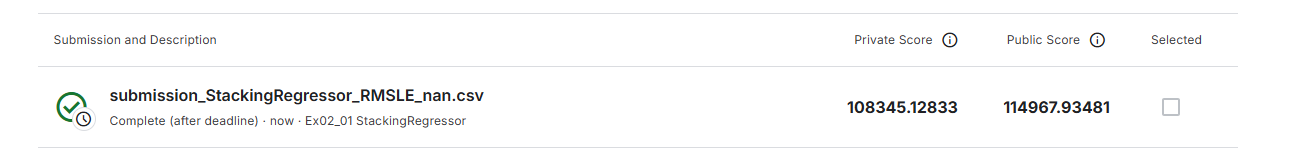

#### 코드 회고

이번 프로젝트에서, 다양한 회귀 모델을 사용해 주택 가격 예측을 시도하였습니다. 전체적으로 EDA(탐색적 데이터 분석), 데이터 전처리, 모델 학습 및 하이퍼파라미터 튜닝, 그리고 앙상블로 이어지는 전체 과정을 통해 모델의 성능을 최대화하기 위한 노력을 기울였습니다. 이 과정에서 성공적인 부분과 개선할 부분을 회고합니다.

1. 탐색적 데이터 분석 (EDA) 및 전처리

EDA에서 데이터를 시각적으로 분석하고 결측치를 확인했습니다. 
날짜 피처 전처리 과정에서는 날짜를 단순히 정수형으로 변환하였는데, 더 심도 있는 날짜 관련 정보(예: 계절, 연도)를 추가적으로 피처로 활용했다면 성능 개선에 도움이 되었을 것입니다.

2. 데이터 변환 및 스케일링

StandardScaler와 PowerTransformer를 사용하여 데이터 스케일링 및 변환을 수행했습니다. PowerTransformer를 통해 데이터 분포를 정규화하는 것은 모델 학습의 안정성과 성능에 기여했을 것입니다. 이러한 스케일링 과정은 특히 경사 하강법 기반의 모델(XGBoost, LightGBM 등)에 유익했습니다.

3. 하이퍼파라미터 튜닝

**베이지안 최적화(Bayesian Optimization)**를 통해 하이퍼파라미터를 최적화하였으며, 이는 GridSearchCV나 RandomizedSearchCV보다 더 효율적으로 최적의 하이퍼파라미터를 찾을 수 있는 방법입니다. 다만, 탐색 횟수(n_iter=50)를 늘리거나, 탐색 공간을 더 정교하게 설정함으로써 더 나은 성능을 기대할 수도 있었을 것입니다.

각 모델별로 탐색한 하이퍼파라미터의 결과를 보면, RandomForest 에서 상대적으로 낮은 성능을 보였습니다. 이는 해당 모델의 특성에 맞는 데이터 전처리와 피처 엔지니어링이 충분하지 않았을 가능성이 있습니다.

4. 앙상블 기법 (Stacking)

Stacking Regressor를 사용하여 최종적으로 여러 모델의 예측 결과를 결합함으로써, 개별 모델보다 나은 성능을 보였습니다. 여러 모델의 장점을 결합하는 방식으로 Gradient Boosting Regressor를 최종 예측기로 사용한 것은 적절한 선택이었지만, 다른 메타 모델(예: Ridge Regression 또는 SVR)을 시도해 볼 여지가 있습니다.

앙상블 기법을 사용했음에도 불구하고, 모델 간의 상관 관계가 높다면 성능이 크게 개선되지 않을 수 있습니다. 따라서 개별 모델 간의 다양성을 더 높이기 위해 다른 유형의 모델을 추가하거나, 블렌딩 등 다른 앙상블 기법을 고려할 수도 있었습니다.

이번 프로젝트를 통해 모델 성능 최적화를 위한 여러 방법들을 실습해볼 수 있었습니다. 하이퍼파라미터 튜닝, 데이터 전처리, 앙상블 기법 등 다양한 시도를 통해 모델의 성능을 향상시키는 데 집중했지만, 여전히 피처 엔지니어링이나 결측치 처리와 같은 기본적인 단계에서 부족한 부분을 많이 느꼈습니다.